Mean Squared Error: 0.7353034736803193


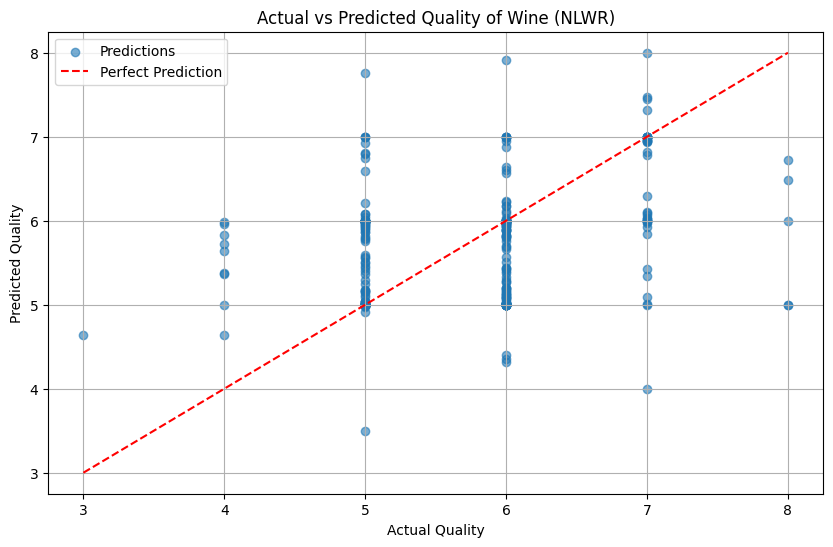

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class NonParametricLogicallyWeightedRegression:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            # Calculate weights based on distance
            weights = np.exp(-np.linalg.norm(self.X_train - x, axis=1)**2 / (2 * self.bandwidth**2))

            # Check if sum of weights is zero
            weight_sum = np.sum(weights)
            if weight_sum == 0:
                # If all weights are zero, append NaN or a default value
                predictions.append(np.nan)  # You could also use 0 or another default value
            else:
                # Calculate the weighted average
                weighted_average = np.sum(weights * self.y_train) / weight_sum
                predictions.append(weighted_average)
        return np.array(predictions)

# Load the Wine Quality Dataset from CSV
data = pd.read_csv("/content/winequality-red.csv")

# Select relevant features and target variable
X = data.drop('quality', axis=1)  # Features
y = data['quality']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Non-Parametric Logically Weighted Regression model
nlwr = NonParametricLogicallyWeightedRegression(bandwidth=0.5)
nlwr.fit(X_train.values, y_train.values)

# Make predictions on the test set
y_pred = nlwr.predict(X_test.values)

# Filter out NaN predictions (if any) for evaluation
y_pred_clean = y_pred[~np.isnan(y_pred)]

# Evaluate the model using Mean Squared Error
if len(y_pred_clean) > 0:  # Ensure there's at least one valid prediction
    mse = mean_squared_error(y_test[:len(y_pred_clean)], y_pred_clean)
    print(f'Mean Squared Error: {mse}')
else:
    print("No valid predictions to evaluate.")

# Visualize the predictions vs actual values (filtering NaN predictions)
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:len(y_pred_clean)], y_pred_clean, alpha=0.6, label='Predictions')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality of Wine (NLWR)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction')  # Diagonal line
plt.legend()
plt.grid()
plt.show()
